In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense,GRU, Conv1D, Flatten,LSTM, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

In [63]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [64]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [65]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


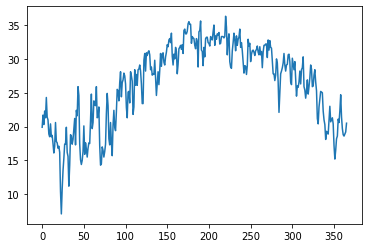

In [66]:
plt.plot(dataset['maxtemp'])


In [67]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [68]:
dataset = pd.get_dummies(dataset,columns=['rainfall'],prefix="",prefix_sep="")  
dataset


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,no,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,0,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,0,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,0,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,0,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4,0,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9,0,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4,0,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9,0,1


In [69]:
##dataset.label.value_counts()
returns = dataset["maxtemp"].pct_change() # Used for univariate example.

column_names = dataset.columns
x = dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.759003,0.438356,0.487273,0.509294,0.498155,0.580645,0.49,0.768595,0.205882,0.397459,0.0,1.0
1,0.650970,0.500000,0.509091,0.524164,0.590406,0.725806,0.83,0.049587,0.117647,0.197822,0.0,1.0
2,0.587258,0.452055,0.523636,0.553903,0.693727,0.951613,0.91,0.000000,0.088235,0.177858,0.0,1.0
3,0.565097,0.520548,0.570909,0.594796,0.708487,0.870968,0.88,0.082645,0.117647,0.226860,0.0,1.0
4,0.481994,0.486301,0.574545,0.635688,0.749077,0.951613,0.81,0.000000,0.088235,0.168784,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.670360,0.400685,0.465455,0.513011,0.568266,0.774194,0.90,0.000000,0.058824,0.254083,0.0,1.0
362,0.778393,0.393836,0.450909,0.490706,0.487085,0.629032,0.85,0.082645,0.029412,0.390200,0.0,1.0
363,0.759003,0.404110,0.465455,0.494424,0.505535,0.629032,0.78,0.380165,0.176471,0.526316,0.0,1.0
364,0.742382,0.414384,0.450909,0.449814,0.505535,0.677419,0.86,0.099174,0.029412,0.299456,0.0,1.0


In [70]:
#plt.plot(df["1"])


In [71]:
returns


0           NaN
1      0.090452
2     -0.064516
3      0.098522
4     -0.044843
         ...   
361   -0.045685
362   -0.010638
363    0.016129
364    0.015873
365    0.067708
Name: maxtemp, Length: 366, dtype: float64

In [72]:
y_train_multi= dataset[['yes','no']]
X_train_multi= dataset.drop(labels=['yes','no'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 2)


In [73]:
from sklearn.preprocessing import LabelBinarizer

#y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
#y_train_multi

In [74]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [75]:
#y_train_multi

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [77]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_train.shape

In [78]:
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#X_test.shape

In [79]:
max=200

In [80]:
#X_train=sequence.pad_sequences(X_train ,maxlen=max)

In [81]:
top=5000


In [82]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   sunshine                366 non-null    float64
 8            winddirection  365 non-null    float64
 9   windspeed               365 non-null    float64
 10  no                      366 non-null    uint8  
 11  yes                     366 non-null    uint8  
dtypes: float64(8), int64(2), uint8(2)
memory usage: 29.4 KB


In [83]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(292, 10, 1)

In [84]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(74, 10, 1)

In [85]:
#from sklearn.preprocessing import LabelBinarizer

#y_train= LabelBinarizer().fit_transform(y_train)
 
#x_train=np.asarray(x_train).astype(np.float32)


In [86]:
##model = Sequential() # initializing model
# input layer and first layer with 50 neurons

##model.add(layers.GRU(3,
             ##        activation = "tanh",
            ##         recurrent_activation = "sigmoid",
             ##        input_shape=(X_train.shape[1],1)))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
##model.add(layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
##model.add(layers.Dense(2))

#model.add(GRU(100))  
#model.add(Dropout(0.2))
#model.add(Dense( 2,  activation='sigmoid'))
#model.add(MaxPool1D(pool_size=(2)))  
#model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(units=50))
# output layer with softmax activation
#model.add(Dense(units=2,activation='softmax'))

In [87]:
model = Sequential()
model.add(GRU(32, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))

In [88]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [89]:
# summary of model layers
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10, 32)            3360      
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
gru_5 (GRU)                  (None, 64)                18816     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [90]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=500,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 6.3902 - accuracy: 0.5665 - val_loss: 1.7457 - val_accuracy: 0.6610
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 6.7987 - accuracy: 0.5451 - val_loss: 1.6846 - val_accuracy: 0.7627
Epoch 3/100
1/1 [==============================] - 0s 73ms/step - loss: 5.9516 - accuracy: 0.6052 - val_loss: 1.7853 - val_accuracy: 0.7627
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 5.7785 - accuracy: 0.5708 - val_loss: 1.8038 - val_accuracy: 0.7627
Epoch 5/100
1/1 [==============================] - 0s 73ms/step - loss: 5.2418 - accuracy: 0.6094 - val_loss: 1.7733 - val_accuracy: 0.7627
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 4.8748 - accuracy: 0.5622 - val_loss: 1.7671 - val_accuracy: 0.7627
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 3.9142 - accuracy: 0.6180 - val_loss: 1.7597 - val_accuracy: 0.7627
Epoch 8/100
1/1 [=====

In [91]:
# predicting target attribute on testing dataset
model.evaluate(X_test, y_test, verbose=1)
  

3/3 [==============================] - 0s 9ms/step - loss: 0.4776 - accuracy: 0.7703


[0.4776269495487213, 0.7702702879905701]

Text(0, 0.5, 'Loss')

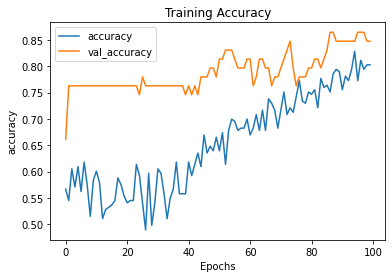

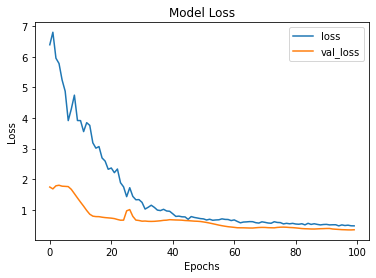

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")